**Task 2: To explore Supervised Machine Learning**

Using Simple linear Regression to predict the percentage of marks that a student is expected to score based on the number of hours he studied.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics  
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the data
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking for any missing figures
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


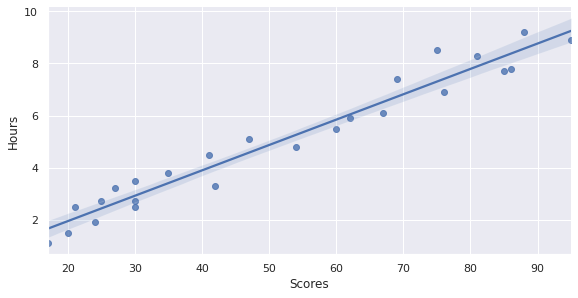

In [6]:
# Analysing the Linear Relationship between independent variable and dependent variables
sns.pairplot(data=data,y_vars=['Hours'],x_vars=['Scores'],kind='reg',height=4,aspect=2,diag_kind="kde")

### From the above graph,we can clearly see that there is a positive linear relation between the depenendent variable and independent variable.

## Fitting Linear Regression

In [7]:
# Slicing Independent and dependent attributes
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

# Dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [8]:
# Initiliazing Linear Regression Model
model_linear = LinearRegression()

# Fitting Linear Model
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

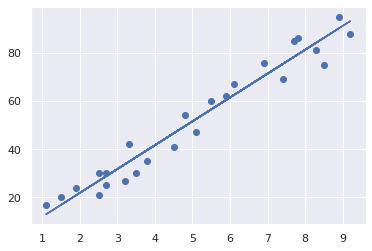

In [9]:
# Plotting the regression line
m=model_linear.coef_
c=model_linear.intercept_
line = m*X+c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [10]:
y_test_pred = model_linear.predict(X_test) 

###### Comparing Actual vs Predicted

In [11]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred.round(2)})

,Actual,Predicted
0,20,16.88
1,27,33.73
2,69,75.36
3,30,26.79
4,62,60.49


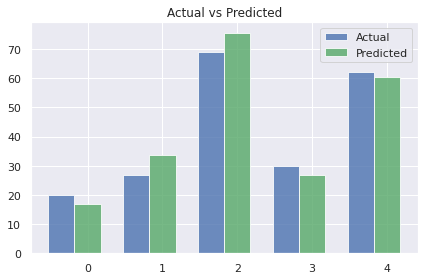

In [12]:
#visualising Actual vs predicted
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, y_test, bar_width,
alpha=opacity,
color='b',
label='Actual')

rects2 = plt.bar(index + bar_width, y_test_pred, bar_width,
alpha=opacity,
color='g',
label='Predicted')

plt.title('Actual vs Predicted')
plt.xticks(index + bar_width, ('0', '1', '2', '3','4'))
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
y_test_pred1 = model_linear.predict([[9.25]]) 

In [14]:
# Single prediction
hours = 9.25
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(y_test_pred1))

No of Hours = 9.25
Predicted Score = [93.69173249]


## Evaluating the model

#### we evaluate the model so that we can compare how well different algorithms perform on a particular dataset.

In [15]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred)) 

Mean Absolute Error: 4.183859899002982
